# Markov chain consisting of a single recurrent class

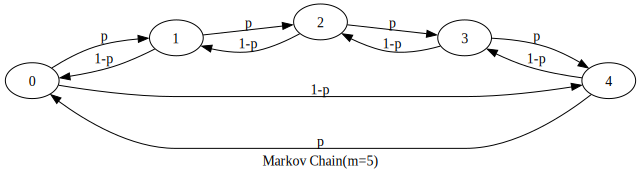

In [1]:
import graphviz

# Create a Graphviz dot data string
dot_data = '''
digraph {
    rankdir=LR;  // Set the rank direction to Left to Right (LR)
    ranksep=1;   // Set the spacing between ranks
    label="Markov Chain(m=5)";  // Set the title of the graph
    
    // Define transitions with labels representing probabilities
    0 -> 1 [label="p"];
    0 -> 4 [label="1-p"];
    1 -> 0 [label="1-p"];
    1 -> 2 [label="p"];
    2 -> 1 [label="1-p"];
    2 -> 3 [label="p"];
    3 -> 2 [label="1-p"];
    3 -> 4 [label="p"];
    4 -> 0 [label="p"];
    4 -> 3 [label="1-p"];
}'''

# Create the Graphviz graph and view it
graph = graphviz.Source(dot_data)
graph

# transition matrix
m=5
$$P=
\begin{bmatrix}
0 & p & 0 & 0 & 1-p \\
1-p & 0 & p & 0 & 0 \\
0 & 1-p & 0 & p & 0 \\
0 & 0 & 1-p & 0 & p \\
p & 0 & 0 & 1-p & 0 \\
\end{bmatrix}
$$



# steady state probabilities pi
$$\large
\begin{eqnarray*}
\left\{
\begin{aligned}
\pi_j & =  \sum_{k=1}^m \pi_k p_kj \quad \text{for }j=1,2,\cdots, m \\
\sum_{k=1}^m \pi_k & = 1 \\
\end{aligned}
\right.
\end{eqnarray*}
$$

or 

$$
\large
\begin{eqnarray*}
A \pi & = & b \\
\end{eqnarray*}
$$

where 
$$\large 
\begin{eqnarray*}
A[i] =
\left\{
\begin{aligned}
& (P^T - E)[i] \quad i=1,...,m-1 \\
& [1,1,...,1] \quad i=m\\
\end{aligned}
\right., \quad
b = \begin{bmatrix}
0 \\
\vdots \\
0 \\
1 \\
\end{bmatrix}, \pi = (\pi_j)_{j=1}^m
\end{eqnarray*}
$$


In [2]:
import numpy as np

M = 5
p = 0.2
P = np.zeros([M, M])
for i in range(M):
    P[i,(i+1) % M] = p
    P[i, (i-1) % M] = 1-p
    
P = np.array(P)
A = P.T - np.identity(5)
A[-1] = np.ones(5)
b = np.zeros(5)
b[-1] = 1

steady_state_probabilities = np.linalg.solve(A, b) # 1/m because P is doublystochastic
steady_state_probabilities

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [3]:
P

array([[0. , 0.2, 0. , 0. , 0.8],
       [0.8, 0. , 0.2, 0. , 0. ],
       [0. , 0.8, 0. , 0.2, 0. ],
       [0. , 0. , 0.8, 0. , 0.2],
       [0.2, 0. , 0. , 0.8, 0. ]])

In [4]:
import numpy as np

def is_stochastic(arr):
    # If there is a negative entry  
    if (arr < 0).any():
        return False
    row_sums = np.sum(arr, axis=1)
    tolerance = 1e-6  
    if not np.allclose(row_sums, 1, rtol=0, atol=tolerance):
        return False
    return True

def is_doubly_stochastic(arr):
    col_sums = np.sum(arr, axis=0)
    tolerance = 1e-6  
    if not np.allclose(col_sums, 1, rtol=0, atol=tolerance):
        return False
    if not is_stochastic(arr):
        return False
    return True

is_doubly_stochastic(P)

True

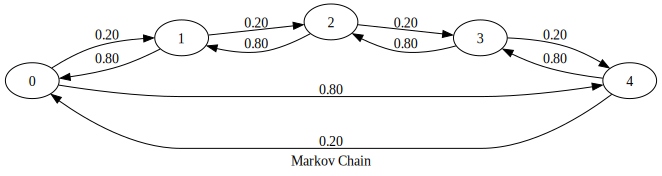

In [5]:
import graphviz


# Create a Graphviz dot data string
dot_data = '''
digraph {
    rankdir=LR;  // Set the rank direction to Left to Right (LR)
    ranksep=1;   // Set the spacing between ranks
    label="Markov Chain";  // Set the title of the graph
'''

# Add nodes and edges based on the transition matrix
num_states = len(P)
for i in range(num_states):
    for j in range(num_states):
        probability = P[i][j]
        if probability > 0:
            dot_data += f'    {i} -> {j} [label="{probability:.2f}"];\n'

dot_data += '}'

# Create the Graphviz graph and view it
graph = graphviz.Source(dot_data)
graph.render("markov_chain")  # This line saves the graph as a file (optional)
graph

## Mean recurrence times
* $t_j^{*} = 1/\pi_j$

In this example,
since P is a doubly stochastic matrix, 
$$
\pi_j = 1/m \quad \text{for all state }j
$$

hence, 
$$
t_j^{*} = m = 5 \quad \text{for all state }j
$$


In [6]:
# Initial state
current_state = np.random.randint(M)
current_state = 0

# Number of steps to simulate
num_steps = 50000

# Simulate the Markov chain
chain = [current_state]
for _ in range(num_steps):
    next_state = np.random.choice(len(P[current_state]), p=P[current_state])
    chain.append(next_state)
    current_state = next_state

chain = np.array(chain)
arrival_times = []
for i in range(M):
    arrival_times.append(np.where(chain == i)[0].tolist())

recurrence_times = []
for times in arrival_times:
    intervals = [times[i+1] - times[i] for i in range(len(times)-1)]
    recurrence_times.append(intervals)

recurrence_times
for i, times in enumerate(recurrence_times):
    times = np.array(times)
    print("Mean recurrence time of {} is {} ".format(i, times.mean()))

Mean recurrence time of 0 is 4.974925373134329 
Mean recurrence time of 1 is 5.02270672159148 
Mean recurrence time of 2 is 5.014645400742301 
Mean recurrence time of 3 is 5.014844533600803 
Mean recurrence time of 4 is 4.9729460911080166 


# number of visit to state j starting from i within the first n transaction
$v_{ij} :=$ number of visits to state j starting from i within the first n transaction

$$\large
\lim_{n\rightarrow \infty} \frac{v_{ij} (n)}{n} = \pi_j 
$$

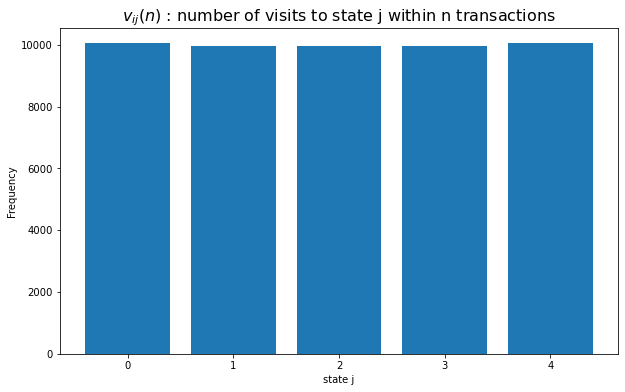

In [7]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figsize to your desired dimensions

# Create a histogram
ax.hist(chain, bins=range(max(chain) + 2), align='left', rwidth=0.8, density=False)

# Add labels and title
ax.set_xlabel('state j')
ax.set_ylabel('Frequency')
ax.set_title('$v_{ij}(n)$ : number of visits to state j within n transactions', fontsize=16)

# Show the plot
plt.show()

## 